## Imports

In [1]:
import os
import os.path as osp
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from eval.visualize import get_vis, combine_vis
from Trainer import Trainer
from options import DynamoOptions

## Setup Options

In [2]:
options = DynamoOptions()
opt = options.parse(args=['--dataset', 'nuscenes'])
opt.load_ckpt = 'ckpt/N_Dynamo-Depth'

### Please reach out for the trained model before running visualizations on waymo 
### Uncomment the following for waymo visualization
# opt = options.parse(args=['--dataset', 'waymo'])
# opt.load_ckpt = 'ckpt/W_Dynamo-Depth'

opt.num_workers = 1
opt.batch_size = 1
opt.print_opt = False 

trainer = Trainer(opt)
trainer.set_eval()

## If `gdown` is not found, run `os.system('pip install gdown')`


=============== Trainer Initialization ===============
pretrained ckpt is not found, downloading it now.


Downloading...
From (uriginal): https://drive.google.com/uc?id=1ULWgnlgSaE6UMA8_MBHZMUuGkcBe4C5j
From (redirected): https://drive.google.com/uc?id=1ULWgnlgSaE6UMA8_MBHZMUuGkcBe4C5j&confirm=t&uuid=7d68886a-c333-4e53-a74b-0924522deacc
To: /home/ys732/workspace/Dynamo/lite-mono-8m-pretrain.pth
100%|██████████| 101M/101M [00:01<00:00, 96.1MB/s] 


pretrained model loaded
Missing model checkpoint ckpt/N_Dynamo-Depth, downloading it now.


Downloading...
From (uriginal): https://drive.google.com/uc?id=1oqQVFyGxo_SxclpinrBlwGSE1gEfVAZY
From (redirected): https://drive.google.com/uc?id=1oqQVFyGxo_SxclpinrBlwGSE1gEfVAZY&confirm=t&uuid=a564cf19-3570-46f9-bcce-329be9e58edb
To: /home/ys732/workspace/Dynamo/N_Dynamo-Depth.zip
100%|██████████| 172M/172M [00:01<00:00, 111MB/s]  


Archive:  N_Dynamo-Depth.zip
   creating: N_Dynamo-Depth/
  inflating: N_Dynamo-Depth/depth_dec.pth  
  inflating: N_Dynamo-Depth/depth_enc.pth  
  inflating: N_Dynamo-Depth/motion_dec.pth  
  inflating: N_Dynamo-Depth/motion_enc.pth  
  inflating: N_Dynamo-Depth/motion_mask.pth  
  inflating: N_Dynamo-Depth/pose_dec.pth  
  inflating: N_Dynamo-Depth/pose_enc.pth  
loading model from folder ckpt/N_Dynamo-Depth
|- Loading depth_dec weights...
|- Loading depth_enc weights...
|- Loading motion_enc weights...
|- Loading pose_enc weights...
|- Loading motion_dec weights...
|- Loading pose_dec weights...
|- Loading motion_mask weights...
=============== Trainer Initialization ===============



In [3]:
trainer.opt.data_path = './assets/tiny_nuscenes/' # only contains the input necessary for the following filenames
filenames = [ 'scenes/scene-0099 85',
              'scenes/scene-0104 2']

### Please reach out for the trained model before running visualizations on waymo 
### Uncomment the following for waymo visualization
# trainer.opt.data_path = './assets/tiny_waymo/' # only contains the input necessary for the following filenames
# filenames = [ 'val/segment-12496433400137459534_120_000_140_000 33',
#               'val/segment-11450298750351730790_1431_750_1451_750 129',
#               'val/segment-7932945205197754811_780_000_800_000 31']

loader = DataLoader(trainer.get_dataset(filenames), 1, False, num_workers=opt.num_workers, pin_memory=True, drop_last=False)

In [4]:
def vis_wrapper(arrangement):
    vis_list = list()
    for batch_idx, inputs in enumerate(loader):
        frame_vis = get_vis(opt, trainer, inputs, ref_frame_id=opt.frame_ids[1], scale=0, items=arrangement[0])
        vis_list.append(frame_vis)
    
    x_len = len(arrangement[0])
    out_frames = combine_vis(vis_list, arrangement)
    for vis in out_frames:
        plt.figure().set_figwidth(20)
        plt.imshow(vis, interpolation='none')
        plt.xticks([i * opt.width + opt.width // 2 for i in range(x_len)], arrangement[0])
        plt.yticks([]) 

## Visualize Depth + Flow + Mask

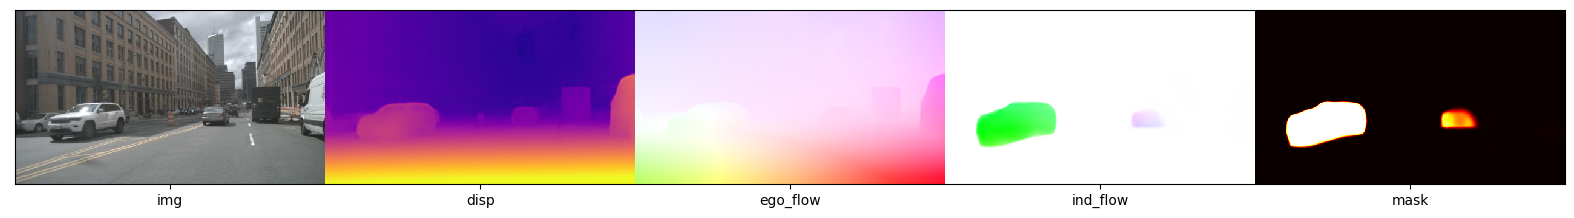

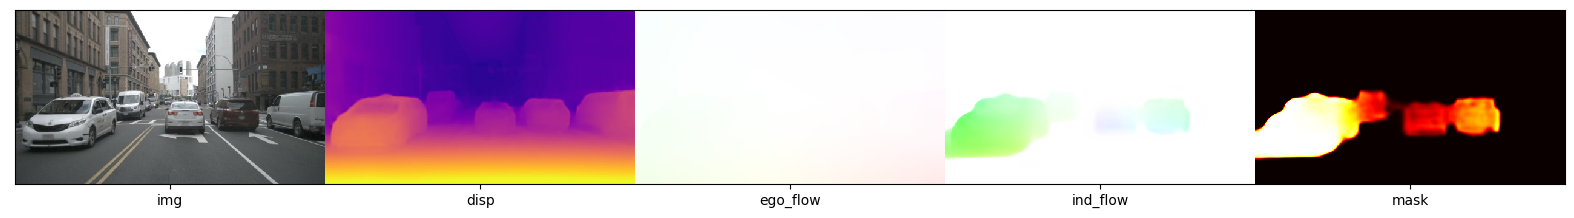

In [5]:
arrangement = [['img', 'disp', 'ego_flow', 'ind_flow', 'mask']]
vis_wrapper(arrangement)

## Visualize All Predictions

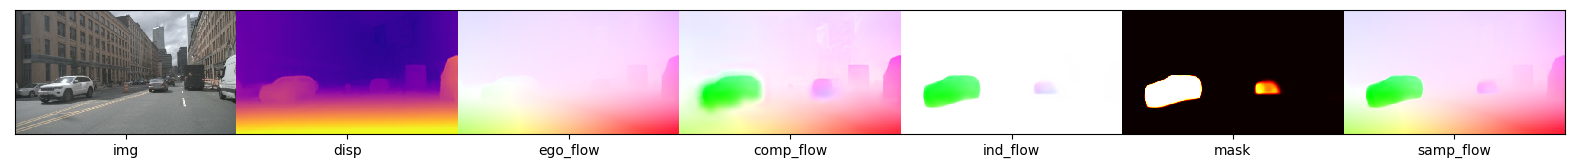

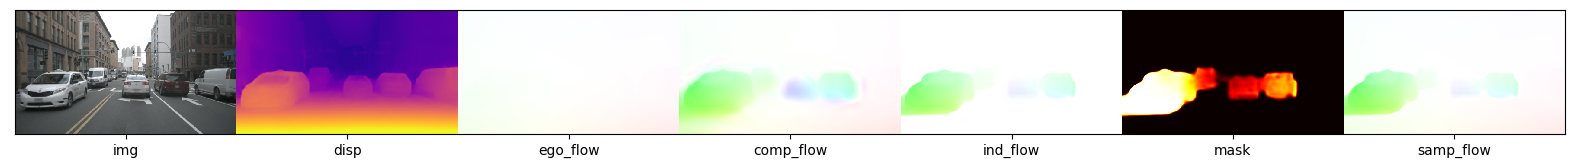

In [6]:
arrangement = [['img', 'disp', 'ego_flow', 'comp_flow', 'ind_flow', 'mask', 'samp_flow']]
vis_wrapper(arrangement)